The steps followed in Data Science project:
    
1)Problem Statement
2)Data Gathering
3)Exploratory Data Analysis(EDA)
4)Feature Engineering
5)Feature Selection
6)Model Building
7)Model Evaluation

In [33]:
#import libraries

import pandas as pd
import numpy as np

#visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

#data preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

In [17]:
df=pd.read_csv("Emp_data_NAN.csv",na_values=["?","NA","not available"])
df

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
0,677509,Lois,36.36,60.0,13.68,NaN,Denver
1,441771,Cheryl,59.47,56.0,26.69,92220.0,Quecreek
2,428945,Joe,54.15,68.0,NaN,50155.0,Michigantown
3,408351,Diane,39.67,51.0,18.30,180294.0,NaN
4,193819,Benjamin,40.31,58.0,4.01,117642.0,Fremont
...,...,...,...,...,...,...,...
95,639892,Jose,22.82,89.0,1.05,129774.0,Biloxi
96,704709,Harold,32.61,77.0,5.93,156194.0,Carol Stream
97,461593,Nicole,52.66,60.0,28.53,95673.0,Detroit
98,392491,Theresa,29.60,57.0,6.99,51015.0,Mc Grath


# Exploratory Data Analysis

EDA stands for Exploratory Data Analysis. where we do analysis and summary of our data by applying some statistical techniques
and graphical representation.

In [ ]:
# instaed of checking all values of dataset, we are checking 1st or last 5 or N values with the help of head() or tail()

In [3]:
df.head(6)

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
0,677509,Lois,36.36,60.0,13.68,NaN,Denver
1,441771,Cheryl,59.47,56.0,26.69,92220.0,Quecreek
2,428945,Joe,54.15,68.0,NaN,50155.0,Michigantown
3,408351,Diane,39.67,51.0,18.30,180294.0,NaN
4,193819,Benjamin,40.31,58.0,4.01,117642.0,Fremont
5,499687,Patrick,34.86,58.0,12.02,72305.0,Macksburg


In [4]:
df.tail(6)

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
94,489424,Phillip,39.43,82.0,1.56,181774.0,Mapleton
95,639892,Jose,22.82,89.0,1.05,129774.0,Biloxi
96,704709,Harold,32.61,77.0,5.93,156194.0,Carol Stream
97,461593,Nicole,52.66,60.0,28.53,95673.0,Detroit
98,392491,Theresa,29.60,57.0,6.99,51015.0,Mc Grath
99,495141,Tammy,38.38,55.0,2.26,93650.0,Alma


In [5]:
#check shape of the dataset

size=df.shape
print(f"Shape of the dataset is : {size}")
print()

print("No of rows present in dataset is: ", size[0])
print()

print("No of columns present in dataset is: ", size[1])

Shape of the dataset is : (100, 7)

No of rows present in dataset is:  100

No of columns present in dataset is:  7


In [6]:
#checking no.of columns and rows present in dataset

print(df.columns)

print()

print(df.index)

Index(['Emp ID', 'First Name', 'Age in Yrs', 'Weight in Kgs', 'Age in Company',
       'Salary', 'City'],
      dtype='object')

RangeIndex(start=0, stop=100, step=1)


In [7]:
#checking the data types of each feature

df.dtypes

Emp ID              int64
First Name         object
Age in Yrs        float64
Weight in Kgs     float64
Age in Company    float64
Salary            float64
City               object
dtype: object

In [8]:
#checking the features and data types of all features with non null count using info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp ID          100 non-null    int64  
 1   First Name      100 non-null    object 
 2   Age in Yrs      99 non-null     float64
 3   Weight in Kgs   97 non-null     float64
 4   Age in Company  98 non-null     float64
 5   Salary          95 non-null     float64
 6   City            99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [9]:
#Using describe() pandas function which will give quick summary of statistical representation

df.describe()

,Emp ID,Age in Yrs,Weight in Kgs,Age in Company,Salary
count,100.000000,99.000000,97.000000,98.000000,95.000000
mean,547072.910000,39.261717,59.587629,9.112653,120237.831579
std,258335.597457,12.194945,18.588612,8.763156,45952.891831
min,134841.000000,21.100000,40.000000,0.070000,42005.000000
25%,328643.750000,28.125000,51.000000,2.267500,84869.000000
50%,493542.000000,37.570000,56.000000,6.435000,117642.000000
75%,766040.000000,49.950000,62.000000,13.927500,162859.500000
max,979607.000000,59.470000,200.000000,34.520000,197537.000000


In [81]:
#Checking duplicate entries
duplicate=df[df.duplicated()]
duplicate

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
14,441771,Cheryl,59.47,56.0,26.69,92220.0,Quecreek
21,969580,Matthew,23.77,56.0,1.47,52237.0,Heathsville


In [68]:
#Checking the presentage of missing values present in dataset

df.isnull().mean()

Emp ID            0.00
First Name        0.00
Age in Yrs        0.01
Weight in Kgs     0.03
Age in Company    0.02
Salary            0.05
City              0.01
dtype: float64

In [69]:
#Checking the number of missing values present in dataset

df.isna().sum()

Emp ID            0
First Name        0
Age in Yrs        1
Weight in Kgs     3
Age in Company    2
Salary            5
City              1
dtype: int64

In [13]:
#Checking the missing value count indivually

df["Age in Yrs"].isna().sum()

1

In [14]:
df["Salary"].isna().sum()

5

In [ ]:
Techniques used in outliers detection:
    
1)Z-Score
2)IQR
3)Boxplot

<AxesSubplot:>

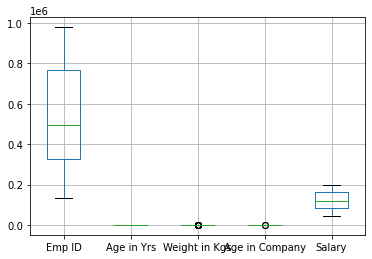

In [16]:
df.boxplot()

No outliers present in "Emp_data_NAN" dataset so for outlier detection we are using another dataset

In [24]:
df1=pd.read_csv("diabetes.csv")
df1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


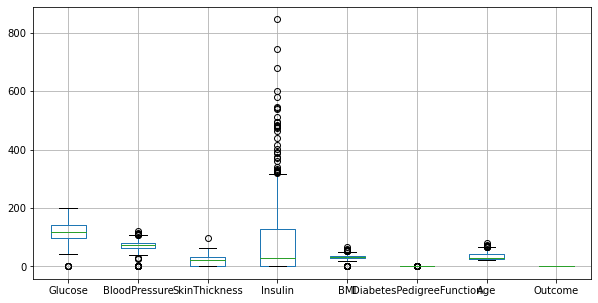

In [100]:
#boxplot: visualization method

plt.figure(figsize=(10,5))
df1.boxplot()
plt.show()

By visually we can see outliers present at "Insulin", "BMI", "Age " columns

<AxesSubplot:>

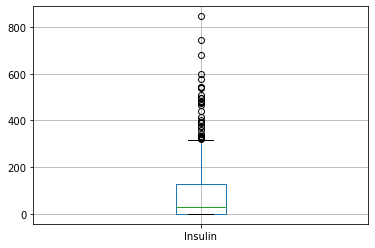

In [101]:
df1[["Insulin"]].boxplot()

<AxesSubplot:>

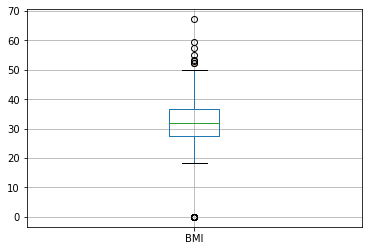

In [102]:
df1[["BMI"]].boxplot()

<AxesSubplot:>

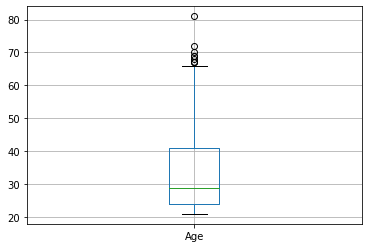

In [103]:
df1[["Age"]].boxplot()

In [104]:
from scipy.stats import zscore

def outlier(df1):
    threshold=3
    z_score=zscore(df1["Insulin"])
    index=np.where(np.abs(z_score)>threshold)
    print(df1["Insulin"].iloc[index])
    
    
outlier(df1)

8      543
13     846
111    495
153    485
186    495
220    478
228    744
247    680
286    545
370    465
409    579
415    474
486    480
584    600
645    440
655    540
695    480
753    510
Name: Insulin, dtype: int64


In [105]:
from scipy.stats import zscore

def outlier(df1):
    threshold=3
    z_score=zscore(df1["BMI"])
    index=np.where(np.abs(z_score)>threshold)
    print(df1["BMI"].iloc[index])
    
    
outlier(df1)

9       0.0
49      0.0
60      0.0
81      0.0
145     0.0
177    67.1
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64


In [106]:
from scipy.stats import zscore

def outlier(df1):
    threshold=3
    z_score=zscore(df1["Age"])
    index=np.where(np.abs(z_score)>threshold)
    print(df1["Age"].iloc[index])
    
    
outlier(df1)

123    69
453    72
459    81
666    70
684    69
Name: Age, dtype: int64


In [107]:
#iqr method

q1=df1["Insulin"].quantile(0.25)
q2=df1["Insulin"].quantile(0.75)

iqr=q2-q1

upper_tail_Insulin=q2 + (1.5* iqr)
lower_tail_Insulin=q1 - (1.5*iqr)

print("Upper tail of Insulin column: ",upper_tail_Insulin)
print()
print("Lower tail of Insulin column: ",lower_tail_Insulin)

Upper tail of Insulin column:  318.125

Lower tail of Insulin column:  -190.875


In [108]:
df1["Insulin"].loc[df1["Insulin"]>upper_tail_Insulin]

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [37]:
df1["Insulin"].loc[df1["Insulin"]<lower_tail_Insulin]

Series([], Name: Insulin, dtype: int64)

In [109]:
q1=df1["BMI"].quantile(0.25)
q2=df1["BMI"].quantile(0.75)

iqr=q2-q1

upper_tail_BMI=q2 + (1.5* iqr)
lower_tail_BMI=q1 - (1.5*iqr)

print("Upper tail of BMI column: ",np.ceil(upper_tail_BMI))
print()
print("Lower tail of BMI column: ",lower_tail_BMI)

Upper tail of BMI column:  51.0

Lower tail of BMI column:  13.35


In [41]:
df1["BMI"].loc[df1["BMI"]>upper_tail_BMI]

120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64

In [45]:
q1=df1["Age"].quantile(0.25)
q2=df1["Age"].quantile(0.75)

iqr=q2-q1

upper_tail_Age=q2 + (1.5* iqr)
lower_tail_Age=q1 - (1.5*iqr)

print("Upper tail of Age column: ",np.ceil(upper_tail_Age))
print()
print("Lower tail of Age column: ",lower_tail_Age)

Upper tail of Age column:  67.0

Lower tail of Age column:  -1.5


In [46]:
df1["Age"].loc[df1["Age"]>upper_tail_Age]

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

Data Balancing

In [47]:
#checking data is balanced or not

df1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data is fully imbalanced

<AxesSubplot:xlabel='Outcome', ylabel='count'>

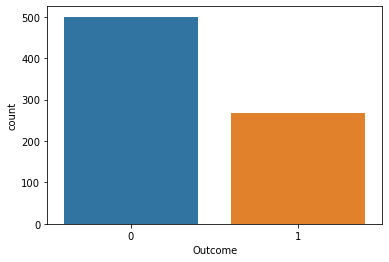

In [26]:
sns.countplot(x=df1["Outcome"])

# Feature Engineering

In [ ]:
1)Drop Duplicate entries
2)Missing Value handling
3)Outliers handling
4)Encoding
5)Data balancing
6)Feature Scalling

In [82]:
#Droping duplicate entries

df.drop_duplicates(inplace=True)

In [83]:
duplicate=df[df.duplicated()]
duplicate

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City


In [ ]:
# misssing value handling

1)Deletion method
2)Imputation method

In [49]:
#deletion method

df_without_NAN=df.dropna()
df_without_NAN.isna().mean()

Emp ID            0.0
First Name        0.0
Age in Yrs        0.0
Weight in Kgs     0.0
Age in Company    0.0
Salary            0.0
City              0.0
dtype: float64

Here we are deleting all NAN values from the dataset

In [51]:
df.drop(["Weight in Kgs","Salary"],axis=1)

,Emp ID,First Name,Age in Yrs,Age in Company,City
0,677509,Lois,36.36,13.68,Denver
1,441771,Cheryl,59.47,26.69,Quecreek
2,428945,Joe,54.15,NaN,Michigantown
3,408351,Diane,39.67,18.30,NaN
4,193819,Benjamin,40.31,4.01,Fremont
...,...,...,...,...,...
95,639892,Jose,22.82,1.05,Biloxi
96,704709,Harold,32.61,5.93,Carol Stream
97,461593,Nicole,52.66,28.53,Detroit
98,392491,Theresa,29.60,6.99,Mc Grath


Here we are droping "Weight in Kgs" and "Salary" columns as those having more NAN count

In [70]:
#imputation method: mean,median,mode

df["Age in Yrs"].fillna(df["Age in Yrs"].mean(),inplace=True)
df["Age in Yrs"].isna().sum()

0

Here we are filling NAN values with its mean value

In [71]:
df["Age in Company"].fillna(12,inplace=True)
df["Age in Company"].isna().sum()

0

Here we are filling NAN values with scaler value,but this will impact on our performane of the model

In [72]:
df.fillna({"Weight in Kgs": df["Weight in Kgs"].mean(),"Salary": df["Salary"].mean()},inplace=True)
df[["Weight in Kgs","Salary"]].isna().sum()

Weight in Kgs    0
Salary           0
dtype: int64

In [75]:
city_name=df["City"].mode()[0]
df["City"].fillna(city_name,inplace=True)
df["City"].isna().sum()

0

The  "City"  feature is categorical,hence we are filling those feature with mode value

In [76]:
df.isna().sum()

Emp ID            0
First Name        0
Age in Yrs        0
Weight in Kgs     0
Age in Company    0
Salary            0
City              0
dtype: int64

All NAN values are handled here, there will be no NAN value present

In [ ]:
#outlier handling method

1)Deletion method
2)Imputation method: median,mode,upper_tail,lower_tail
3)Transformation method: log transform,square root transform,cube root transform,reciprocol transform

<AxesSubplot:>

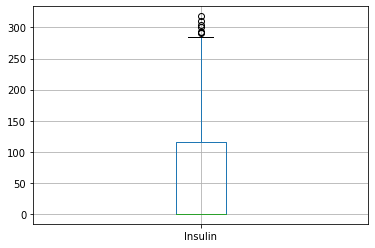

In [87]:
#Deletion method

index=np.where(df1["Insulin"]>=upper_tail_Insulin)[0]
df1.drop(index,inplace=True)
df1[["Insulin"]].boxplot()

Here we trying to drop all the outlier values which are greater than upper_tail, but this is not the good practice to handle outliers

<AxesSubplot:>

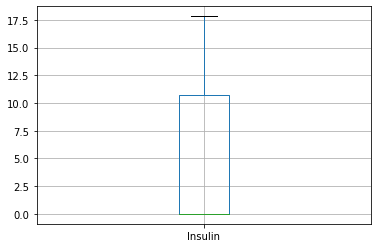

In [90]:
#Transformation method

np.sqrt(df1[["Insulin"]]).boxplot()

<AxesSubplot:>

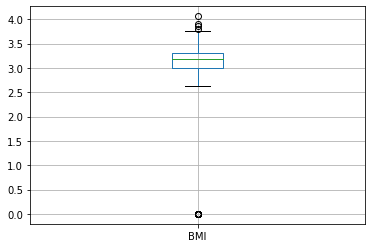

In [91]:
np.cbrt(df1[["BMI"]]).boxplot()

<AxesSubplot:>

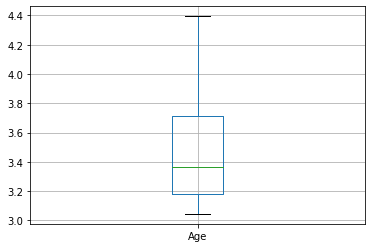

In [92]:
np.log(df1[["Age"]]).boxplot()

In [112]:
#Imputation method

df1["Insulin"].loc[df1["Insulin"]>=upper_tail_Insulin]=upper_tail_Insulin

C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_9752\2646126602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Insulin"].loc[df1["Insulin"]>=upper_tail_Insulin]=upper_tail_Insulin


<AxesSubplot:>

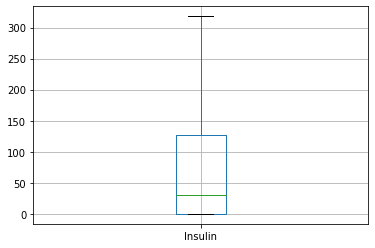

In [113]:
df1[["Insulin"]].boxplot()

In [115]:
df1["BMI"].loc[df1["BMI"]>=upper_tail_BMI]=upper_tail_BMI

C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_9752\611768747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["BMI"].loc[df1["BMI"]>=upper_tail_BMI]=upper_tail_BMI


In [117]:
df1["BMI"].loc[df1["BMI"]<=lower_tail_BMI]=lower_tail_BMI

C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_9752\3860636576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["BMI"].loc[df1["BMI"]<=lower_tail_BMI]=lower_tail_BMI


<AxesSubplot:>

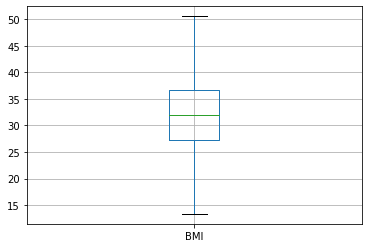

In [118]:
df1[["BMI"]].boxplot()

In [119]:
df1["Age"].loc[df1["Age"]>=upper_tail_Age]=upper_tail_Age

C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_9752\3308549286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"].loc[df1["Age"]>=upper_tail_Age]=upper_tail_Age


<AxesSubplot:>

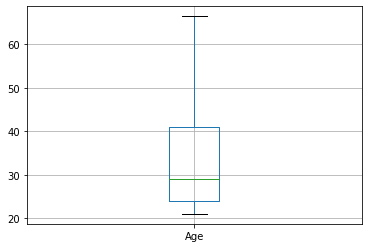

In [120]:
df1[["Age"]].boxplot()

In [ ]:
#Encoding Techniques

1)Labled Encoding
2)One hot Encoding
3)Binary Encoding

#For encoding technique we required a categorical feature thats why we are using here "Lending_TRAINING_DATA" dataset.

In [6]:
df2=pd.read_csv("Lending_TRAINING_DATA.csv")
df2

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,...,CREDIT.CARD.NUMBER,CREDIT.CARDS.CATEGORY,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,PRIMARY.ASSET.MODELNO,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,27497000024,JB02005,27497,2017-02-28,22:11:01,Declined,Straight Through Process,PD_DE,Single,Male,...,NaN,NaN,REF-FF HOME,SAMSUNG,RT30K3723S8/HL,F,F,T,F,F
1,25556001005,RD02622,25556,2017-02-28,22:05:51,Approved,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,TELEVISION,SONY,KLV-29P423D,F,T,F,F,F
2,27220000249,SK02345,27220,2017-02-28,21:58:34,Approved,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,AIR CONDITIONER,ELECTROLUX,AIR CONDITIONER VANILLA,F,T,F,F,F
3,27067000029,DN30900,27067,2017-02-28,21:52:46,Declined,Under.Writer,DCLN,Married,Male,...,NaN,NaN,HOME THEATRE,TARGET,K1110 FM,F,F,T,F,F
4,26189000138,JB02005,26189,2017-02-28,21:52:33,Approved,Straight Through Process,APRV,Married,Male,...,NaN,NaN,SPLIT AC,ELECTROLUX,ES18T5C,F,F,F,T,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,25150001203,RP05168,25150,2017-02-22,10:43:08,Approved,Straight Through Process,APRV,Married,Male,...,NaN,NaN,PANEL - LED,SAMSUNG,UA32K5300ARLXL,F,F,F,T,F
7755,27199000069,RS24113,27199,2017-02-22,10:41:45,Declined,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,SAWM,LG,P8072R3F,F,F,T,T,F
7756,26805000032,SB44646,26805,2017-02-22,10:34:56,Declined,Under.Writer,DCLN,Single,Male,...,NaN,NaN,TELEVISION,SONY,KLV-32R302D,T,F,T,F,F
7757,28188000004,JD25733,28188,2017-02-22,10:24:20,Approved,Straight Through Process,LOS_DISB,Married,Male,...,NaN,NaN,AIR CONDITIONER,WHIRLPOOL,1.5T MAGICOOL PRM COPR 2S -WHITE-S,F,F,T,F,F


In [7]:
#Checking data type of each feature

df2.dtypes

APPLICATION.ID                     int64
DSA.ID                            object
DEALER.ID                          int64
APP.DATE                          object
TIME.STAMP                        object
APPLICATION.STATUS                object
QUEUE.ID                          object
CURRENT.STAGE                     object
MARITAL.STATUS                    object
GENDER                            object
AGE                                int64
EDUCATION                         object
RESIDENCE.TYPE                    object
CITY                              object
STATE                             object
ZIP.CODE                           int64
EMPLOY.CONSTITUTION               object
NET.TAKE.HOME.SALARY             float64
PAN.STATUS                        object
CIBIL.SCORE                       object
APPLICATION.SCORE                 object
RESIDENTIAL.ADDRESS.SCORE        float64
OFFICE.ADDRESS.SCORE             float64
NAME.SCORE                       float64
APPROVED.AMOUNT 

In [8]:
#Checking unique values present in feature

df2["APPLICATION.STATUS"].unique()

array(['Declined', 'Approved'], dtype=object)

In [9]:
df2["APPLICATION.STATUS"].nunique()

2

In [10]:
#data is ordinal data,hence we are using labeled encoding

df2.replace({"Declined":0,"Approved":1},inplace=True)
df2.head()

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,...,CREDIT.CARD.NUMBER,CREDIT.CARDS.CATEGORY,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,PRIMARY.ASSET.MODELNO,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,27497000024,JB02005,27497,2017-02-28,22:11:01,0,Straight Through Process,PD_DE,Single,Male,...,NaN,NaN,REF-FF HOME,SAMSUNG,RT30K3723S8/HL,F,F,T,F,F
1,25556001005,RD02622,25556,2017-02-28,22:05:51,1,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,TELEVISION,SONY,KLV-29P423D,F,T,F,F,F
2,27220000249,SK02345,27220,2017-02-28,21:58:34,1,Straight Through Process,PD_DE,Married,Male,...,NaN,NaN,AIR CONDITIONER,ELECTROLUX,AIR CONDITIONER VANILLA,F,T,F,F,F
3,27067000029,DN30900,27067,2017-02-28,21:52:46,0,Under.Writer,DCLN,Married,Male,...,NaN,NaN,HOME THEATRE,TARGET,K1110 FM,F,F,T,F,F
4,26189000138,JB02005,26189,2017-02-28,21:52:33,1,Straight Through Process,APRV,Married,Male,...,NaN,NaN,SPLIT AC,ELECTROLUX,ES18T5C,F,F,F,T,F


In [11]:
df2["MARITAL.STATUS"].unique()

array(['Single', 'Married'], dtype=object)

In [12]:
df2.replace({"Single":0,"Married":1},inplace=True)
df2.head()

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,...,CREDIT.CARD.NUMBER,CREDIT.CARDS.CATEGORY,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,PRIMARY.ASSET.MODELNO,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,27497000024,JB02005,27497,2017-02-28,22:11:01,0,Straight Through Process,PD_DE,0,Male,...,NaN,NaN,REF-FF HOME,SAMSUNG,RT30K3723S8/HL,F,F,T,F,F
1,25556001005,RD02622,25556,2017-02-28,22:05:51,1,Straight Through Process,PD_DE,1,Male,...,NaN,NaN,TELEVISION,SONY,KLV-29P423D,F,T,F,F,F
2,27220000249,SK02345,27220,2017-02-28,21:58:34,1,Straight Through Process,PD_DE,1,Male,...,NaN,NaN,AIR CONDITIONER,ELECTROLUX,AIR CONDITIONER VANILLA,F,T,F,F,F
3,27067000029,DN30900,27067,2017-02-28,21:52:46,0,Under.Writer,DCLN,1,Male,...,NaN,NaN,HOME THEATRE,TARGET,K1110 FM,F,F,T,F,F
4,26189000138,JB02005,26189,2017-02-28,21:52:33,1,Straight Through Process,APRV,1,Male,...,NaN,NaN,SPLIT AC,ELECTROLUX,ES18T5C,F,F,F,T,F


In [19]:
df2["CURRENT.STAGE"].unique()

array(['PD_DE', 'DCLN', 'APRV', 'SRNV', 'INV_GNR', 'LOS_DISB', 'LOS_BDE',
       'LOS_ERROR'], dtype=object)

In [20]:
df2["CURRENT.STAGE"].nunique()

8

In [22]:
#data is nominal data,hence we are using one hot encoding.But after one hot encoding no.of columns get increase by no.of unique
#values

pd.get_dummies(df2,columns=["CURRENT.STAGE"],prefix="_")

,APPLICATION.ID,DSA.ID,DEALER.ID,APP.DATE,TIME.STAMP,APPLICATION.STATUS,QUEUE.ID,MARITAL.STATUS,GENDER,AGE,...,PAN,BANK_PASSBOOK,__APRV,__DCLN,__INV_GNR,__LOS_BDE,__LOS_DISB,__LOS_ERROR,__PD_DE,__SRNV
0,27497000024,JB02005,27497,2017-02-28,22:11:01,0,Straight Through Process,0,Male,30,...,F,F,0,0,0,0,0,0,1,0
1,25556001005,RD02622,25556,2017-02-28,22:05:51,1,Straight Through Process,1,Male,38,...,F,F,0,0,0,0,0,0,1,0
2,27220000249,SK02345,27220,2017-02-28,21:58:34,1,Straight Through Process,1,Male,52,...,F,F,0,0,0,0,0,0,1,0
3,27067000029,DN30900,27067,2017-02-28,21:52:46,0,Under.Writer,1,Male,57,...,F,F,0,1,0,0,0,0,0,0
4,26189000138,JB02005,26189,2017-02-28,21:52:33,1,Straight Through Process,1,Male,38,...,T,F,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,25150001203,RP05168,25150,2017-02-22,10:43:08,1,Straight Through Process,1,Male,39,...,T,F,1,0,0,0,0,0,0,0
7755,27199000069,RS24113,27199,2017-02-22,10:41:45,0,Straight Through Process,1,Male,31,...,T,F,0,0,0,0,0,0,1,0
7756,26805000032,SB44646,26805,2017-02-22,10:34:56,0,Under.Writer,0,Male,21,...,F,F,0,1,0,0,0,0,0,0
7757,28188000004,JD25733,28188,2017-02-22,10:24:20,1,Straight Through Process,1,Male,31,...,F,F,0,0,0,0,1,0,0,0


In [ ]:
#Data balancing

1)Upsampling
2)Downsampling

In [34]:
x=df1.drop("Outcome",axis=1)
y=df1["Outcome"]

smt=SMOTE()
x_samples,y_samples=smt.fit_resample(x,y)

In [36]:
y_samples.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

Data is balanced now

In [ ]:
#feature scalling

1)Normalization
2)Standerdization

In [41]:
#Normalization

x=df1.drop("Outcome",axis=1)
normal_scaler=MinMaxScaler()
normal_scaler.fit(x)
array=normal_scaler.transform(x)
normal_df1=pd.DataFrame(array,columns=x.columns)
normal_df1


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [42]:
#Standerdization

x=df1.drop("Outcome",axis=1)
std_scaler=StandardScaler()
std_scaler.fit(x)
array=std_scaler.transform(x)
std_df1=pd.DataFrame(array,columns=x.columns)
std_df1


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


# Feature Selection

In [ ]:
1)Filter Method
2)Wrapper Method
3)Embedded Method

In [ ]:
#Filter method

In [45]:
#Checking missing value count: if any feature having more than 25% or 30% NAN values then we are droping such feature

df.isna().mean()*100

Emp ID            0.0
First Name        0.0
Age in Yrs        1.0
Weight in Kgs     3.0
Age in Company    2.0
Salary            5.0
City              1.0
dtype: float64

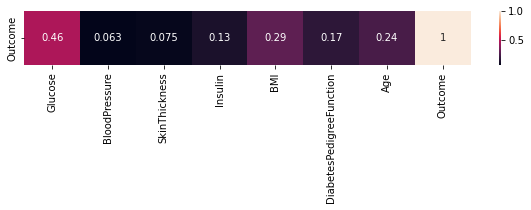

In [46]:
#Checking correlation between dependant and independant feature

correlation=df1.corr()
a=correlation.tail(1)
plt.figure(figsize=(10,1))
sns.heatmap(a,annot=True)
plt.show()

<AxesSubplot:>

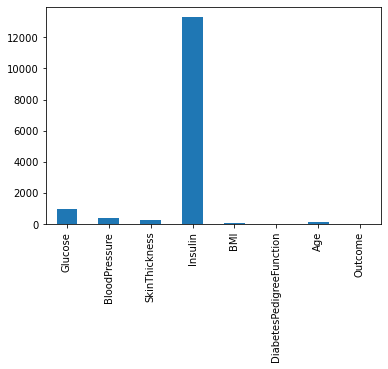

In [47]:
#Variance Threshold

df1.var().plot(kind="bar")

C:\Users\JOTIBA\anaconda3\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


<AxesSubplot:>

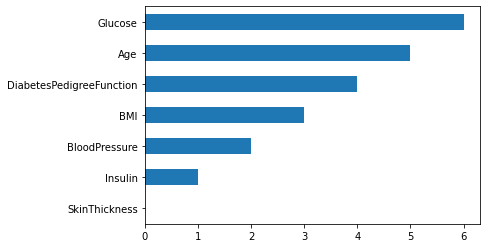

In [49]:
#fisher score

from skfeature.function.similarity_based import fisher_score
x=df1.drop("Outcome",axis=1)
y=df1["Outcome"]
fisher_score=fisher_score.fisher_score(x.values,y)
s1=pd.Series(fisher_score,index=x.columns)
s1.sort_values().plot(kind="barh")

<AxesSubplot:>

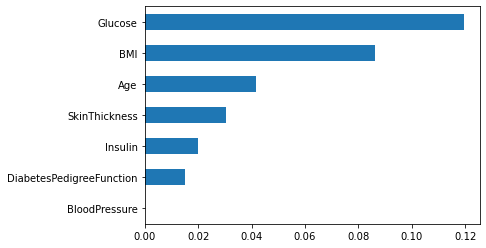

In [50]:
#information gain

from sklearn.feature_selection import mutual_info_regression
gain=mutual_info_regression(x,y)
s1=pd.Series(gain,index=x.columns)
s1.sort_values().plot(kind="barh")

In [ ]:
#Wrapper method
1)Forword Feature Selection
2)Backword Feature Elemenation

In [54]:
#forword selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

x=df1.drop("Outcome",axis=1)
y=df1["Outcome"]

knn=KNeighborsClassifier()
for i in range(3,6):
    sfs=SequentialFeatureSelector(knn,n_features_to_select=i,direction="forward",cv=7)
    sfs.fit(x,y)
    array=sfs.get_support()
    feature=x.columns[np.where(array==True)[0]]
    print(feature)
    knn.fit(x[feature],y)
    accuracy=knn.score(x[feature],y)
    print(i,accuracy)

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
3 0.80859375
Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
4 0.8125
Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
5 0.8177083333333334


In [55]:
#backword feature Elemenation

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

x=df1.drop("Outcome",axis=1)
y=df1["Outcome"]

knn=KNeighborsClassifier()
sfs=SequentialFeatureSelector(knn,n_features_to_select=5,direction="backward",cv=7)
sfs.fit(x,y)
array=sfs.get_support()
feature=x.columns[np.where(array==True)[0]]
print(feature)
       

Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


From above observation we can conclude that "Glucose", "BMI","Age","Insulin","DiabetesPedigreeFunction","BloodPressure" are the top important features.